In [1]:
# imports
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgbm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# loading the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# getting the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# converting object to category for lightgbm
for col in df.select_dtypes(['object']).columns:
  df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    category
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    category
 13  alive        891 non-null    category
 14  alone        891 non-null    bool    
dtypes: bool(2), category(7), float64(2), int64(4)
memory usage: 50.8 KB


In [5]:
# creating X & y
X = df.drop(['survived'], axis=1)
y = df['survived']

In [6]:
# splitting the dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [7]:
# getting the shape of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 14) (179, 14) (712,) (179,)


In [8]:
# training a model
model = lgbm.LGBMClassifier(objective='binary', boosting_type='goss', learning_rate=0.09, feature_fraction=.8, random_state=20)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric=['binary_logloss'], verbose=10)

[10]	valid_0's binary_logloss: 0.220563	valid_0's binary_logloss: 0.220563
[20]	valid_0's binary_logloss: 0.0932168	valid_0's binary_logloss: 0.0932168
[30]	valid_0's binary_logloss: 0.0450009	valid_0's binary_logloss: 0.0450009
[40]	valid_0's binary_logloss: 0.0224893	valid_0's binary_logloss: 0.0224893
[50]	valid_0's binary_logloss: 0.0107055	valid_0's binary_logloss: 0.0107055
[60]	valid_0's binary_logloss: 0.00433478	valid_0's binary_logloss: 0.00433478
[70]	valid_0's binary_logloss: 0.00206602	valid_0's binary_logloss: 0.00206602
[80]	valid_0's binary_logloss: 0.000911689	valid_0's binary_logloss: 0.000911689
[90]	valid_0's binary_logloss: 0.000481173	valid_0's binary_logloss: 0.000481173
[100]	valid_0's binary_logloss: 0.000278887	valid_0's binary_logloss: 0.000278887


LGBMClassifier(boosting_type='goss', feature_fraction=0.8, learning_rate=0.09,
               objective='binary', random_state=20)

In [9]:
# checking the accuracy
print('Accuracy:', (accuracy_score(y_test, model.predict(X_test)) * 100).round(2))

Accuracy: 100.0


In [10]:
# confusion matrix
print(confusion_matrix(y_test, model.predict(X_test)))

[[112   0]
 [  0  67]]


In [11]:
# printing a clf report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        67

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



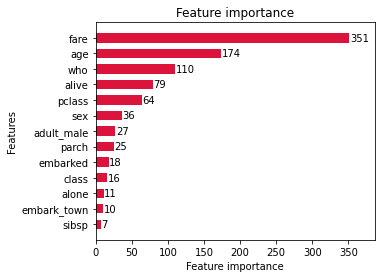

In [12]:
# plotting the feature importances
lgbm.plot_importance(booster=model, figsize=(5,4), height=0.6, grid=False, color='crimson');

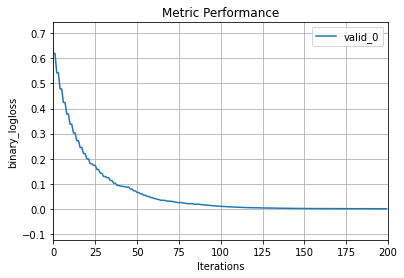

In [13]:
# metric evaluation
lgbm.plot_metric(booster=model, title='Metric Performance');